In [3]:
import csv
import tensorflow as tf
import os
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [370]:
import pandas as pd

# Step 1: Load the data from the CSV file
file_path = 'data_TA.csv'
df = pd.read_csv(file_path, delimiter=';')

df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,01/10/2020,24.0,30.6,25.9,84.0,6.7,4.0,2.0
1,02/10/2020,23.0,35.3,27.7,76.0,0.5,8.0,2.0
2,03/10/2020,22.8,34.2,26.9,78.0,8.0,8.0,2.0
3,04/10/2020,22.6,32.3,27.3,76.0,6.6,4.0,1.0
4,05/10/2020,23.6,35.0,28.4,75.0,4.1,8.0,2.0


In [371]:
# Step 2: Clean up the 'Tanggal' column
df['Tanggal'] = df['Tanggal'].str.replace(' ', '')
df['Tanggal'] = df['Tanggal'].str.replace('/', '-')

# Display the first few rows after cleaning the 'Tanggal' column
print("Step 2 - Cleaned 'Tanggal' column:")
(df.head())

Step 2 - Cleaned 'Tanggal' column:


,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,01-10-2020,24.0,30.6,25.9,84.0,6.7,4.0,2.0
1,02-10-2020,23.0,35.3,27.7,76.0,0.5,8.0,2.0
2,03-10-2020,22.8,34.2,26.9,78.0,8.0,8.0,2.0
3,04-10-2020,22.6,32.3,27.3,76.0,6.6,4.0,1.0
4,05-10-2020,23.6,35.0,28.4,75.0,4.1,8.0,2.0


In [372]:
# normalize
from sklearn.preprocessing import MinMaxScaler

# Step 3: Selecting the columns to normalize
columns_to_normalize = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg']

# Step 4: Initialize the scaler and apply to selected columns
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows after normalization
print("Step 4 - Normalized data:")
(df.head())

Step 4 - Normalized data:


,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,01-10-2020,0.60,0.509091,0.384615,0.830149,0.00067,0.230769,0.50
1,02-10-2020,0.40,0.936364,0.661538,0.745223,0.00005,0.538462,0.50
2,03-10-2020,0.36,0.836364,0.538462,0.766454,0.00080,0.538462,0.50
3,04-10-2020,0.32,0.663636,0.600000,0.745223,0.00066,0.230769,0.25
4,05-10-2020,0.52,0.909091,0.769231,0.734607,0.00041,0.538462,0.50


In [373]:
# Step 5: Fill missing data using forward fill and backward fill
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill

# Display the first few rows after filling missing data
print("Step 5 - Filled missing data:")
(df.head())

Step 5 - Filled missing data:


,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,01-10-2020,0.60,0.509091,0.384615,0.830149,0.00067,0.230769,0.50
1,02-10-2020,0.40,0.936364,0.661538,0.745223,0.00005,0.538462,0.50
2,03-10-2020,0.36,0.836364,0.538462,0.766454,0.00080,0.538462,0.50
3,04-10-2020,0.32,0.663636,0.600000,0.745223,0.00066,0.230769,0.25
4,05-10-2020,0.52,0.909091,0.769231,0.734607,0.00041,0.538462,0.50


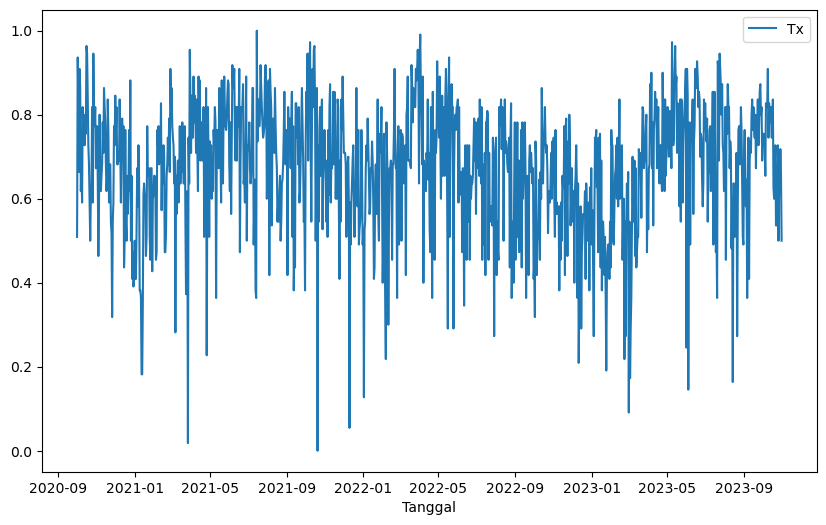

In [374]:
tanggal = pd.to_datetime(df['Tanggal'], format="%d-%m-%Y")
price = df['Tx'].astype(float)
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tanggal, price, label='Tx')

# Menambahkan label dan judul
plt.xlabel('Tanggal')

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

In [7]:
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,01-10-2020,0.60,0.509091,0.384615,0.830149,0.00067,0.230769,0.50
1,02-10-2020,0.40,0.936364,0.661538,0.745223,0.00005,0.538462,0.50
2,03-10-2020,0.36,0.836364,0.538462,0.766454,0.00080,0.538462,0.50
3,04-10-2020,0.32,0.663636,0.600000,0.745223,0.00066,0.230769,0.25
4,05-10-2020,0.52,0.909091,0.769231,0.734607,0.00041,0.538462,0.50


In [376]:
import pandas as pd

# Convert the 'Tanggal' column to datetime format
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')

In [377]:
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,2020-10-01,0.60,0.509091,0.384615,0.830149,0.00067,0.230769,0.50
1,2020-10-02,0.40,0.936364,0.661538,0.745223,0.00005,0.538462,0.50
2,2020-10-03,0.36,0.836364,0.538462,0.766454,0.00080,0.538462,0.50
3,2020-10-04,0.32,0.663636,0.600000,0.745223,0.00066,0.230769,0.25
4,2020-10-05,0.52,0.909091,0.769231,0.734607,0.00041,0.538462,0.50


In [636]:
# Filter the data for the training set (October 2020 - July 2023)
train_data = df[(df['Tanggal'] >= '2020-10-01') & 
                (df['Tanggal'] <= '2023-07-31')]
x
# Display the first few rows of the filtered training data
(train_data.head())


,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
0,2020-10-01,0.60,0.509091,0.384615,0.830149,0.00067,0.230769,0.50
1,2020-10-02,0.40,0.936364,0.661538,0.745223,0.00005,0.538462,0.50
2,2020-10-03,0.36,0.836364,0.538462,0.766454,0.00080,0.538462,0.50
3,2020-10-04,0.32,0.663636,0.600000,0.745223,0.00066,0.230769,0.25
4,2020-10-05,0.52,0.909091,0.769231,0.734607,0.00041,0.538462,0.50


In [637]:
#data validation (Agustus dan september 2023)
validation_data = df[(df['Tanggal'] >= '2023-08-01') & 
                                  (df['Tanggal'] <= '2023-09-30')]

Jumlah data yang digunakan dalam training set: 1034


In [12]:
validation_data.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
1034,2023-08-01,0.58,0.627273,0.676923,0.723992,0.00048,0.384615,0.75
1035,2023-08-02,0.48,0.818182,0.707692,0.702760,0.00040,0.230769,0.50
1036,2023-08-03,0.50,0.454545,0.523077,0.819533,0.00060,0.461538,0.50
1037,2023-08-04,0.50,0.818182,0.784615,0.745223,0.00000,0.461538,0.75
1038,2023-08-05,0.56,0.754545,0.753846,0.766454,0.00069,0.384615,0.75


In [13]:
#data testing (oktober 2023)
testing_data = df[(df['Tanggal'] >= '2023-10-01') & 
                                  (df['Tanggal'] <= '2023-10-31')]

In [53]:
testing_data.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss,ff_x,ff_avg
1095,2023-10-01,0.72,0.754545,0.615385,0.840764,0.00000,0.307692,0.5
1096,2023-10-02,0.72,0.754545,0.615385,0.840764,0.00000,0.307692,0.5
1097,2023-10-03,0.72,0.754545,0.615385,0.840764,0.00000,0.307692,0.5
1098,2023-10-04,0.52,0.727273,0.707692,0.819533,0.00002,0.307692,0.5
1099,2023-10-05,0.68,0.654545,0.569231,0.893843,0.00048,0.384615,0.5


In [15]:
# save data
train_file_path = 'data_train_TA.csv'
validation_file_path = 'data_validation_TA.csv'
testing_file_path = 'data_test_TA.csv'

train_data.to_csv(train_file_path, index=False)
validation_data.to_csv(validation_file_path, index=False)
testing_data.to_csv(testing_file_path, index=False)


print(f"Data training disimpan dalam file: {train_file_path}")
print(f"Data validation disimpan dalam file: {validation_file_path}")
print(f"Data testing disimpan dalam file: {testing_file_path}")

Data training disimpan dalam file: data_train_TA.csv
Data validation disimpan dalam file: data_validation_TA.csv
Data testing disimpan dalam file: data_test_TA.csv


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import RandomizedSearchCV

In [609]:
import numpy as np
import pandas as pd

# Load the datasets
train_data = pd.read_csv('data_train_TA.csv')
validation_data = pd.read_csv('data_validation_TA.csv')
testing_data = pd.read_csv('data_test_TA.csv')

# Use the 'Tx' column directly without normalization
train_values = train_data[['Tx']].values
validation_values = validation_data[['Tx']].values
testing_values = testing_data[['Tx']].values

# Convert 'Tanggal' (Date) to datetime format
train_data['Tanggal'] = pd.to_datetime(train_data['Tanggal'], format='%Y-%m-%d')
validation_data['Tanggal'] = pd.to_datetime(validation_data['Tanggal'], format='%Y-%m-%d')
testing_data['Tanggal'] = pd.to_datetime(testing_data['Tanggal'], format='%Y-%m-%d')

# Extract day of the year as a feature
train_dates = train_data['Tanggal'].dt.dayofyear.values
validation_dates = validation_data['Tanggal'].dt.dayofyear.values
testing_dates = testing_data['Tanggal'].dt.dayofyear.values

# Convert dates to sine and cosine features (cyclical encoding)
train_dates_sin = np.sin(2 * np.pi * train_dates / 365)
train_dates_cos = np.cos(2 * np.pi * train_dates / 365)

validation_dates_sin = np.sin(2 * np.pi * validation_dates / 365)
validation_dates_cos = np.cos(2 * np.pi * validation_dates / 365)

testing_dates_sin = np.sin(2 * np.pi * testing_dates / 365)
testing_dates_cos = np.cos(2 * np.pi * testing_dates / 365)

In [619]:
# Parameters
time_steps = 10
n_cols = 3  # Tx, date_sin, date_cos

# Creating a Training set with 10 time-steps
x_train = []
y_train = []

for i in range(time_steps, len(train_values)):
    # Combine temperature and date features
    sequence = np.hstack((
        train_values[i-time_steps:i, :1],  # Tx values
        train_dates_sin[i-time_steps:i].reshape(-1, 1),  # Sin of dates
        train_dates_cos[i-time_steps:i].reshape(-1, 1)   # Cos of dates
    ))
    x_train.append(sequence)
    y_train.append(train_values[i, 0])

# Converting to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train) 

# Creating a Validation set with 10 time-steps
x_val = []
y_val = []

for i in range(time_steps, len(validation_values)):
    # Combine temperature and date features
    sequence = np.hstack((
        validation_values[i-time_steps:i, :1],  # Tx values
        validation_dates_sin[i-time_steps:i].reshape(-1, 1),  # Sin of dates
        validation_dates_cos[i-time_steps:i].reshape(-1, 1)   # Cos of dates
    ))
    x_val.append(sequence)
    y_val.append(validation_values[i, 0])

# Converting to numpy arrays
x_val, y_val = np.array(x_val), np.array(y_val)

# Creating a Testing set with 10 time-steps
x_test = []
y_test = []

for i in range(time_steps, len(testing_values)):
    # Combine temperature and date features
    sequence = np.hstack((
        testing_values[i-time_steps:i, :1],  # Tx values
        testing_dates_sin[i-time_steps:i].reshape(-1, 1),  # Sin of dates
        testing_dates_cos[i-time_steps:i].reshape(-1, 1)   # Cos of dates
    ))
    x_test.append(sequence)
    y_test.append(testing_values[i, 0])

# Converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input data to match the LSTM input shape (n_samples, time_steps, n_features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], n_cols))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [611]:
x_train.shape[1] , y_train.shape, time_steps

(10, (1024,), 10)

In [612]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsolutePercentageError, RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, n_cols)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))


model.add(Dense(1))


In [614]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsolutePercentageError, RootMeanSquaredError

# Compile the model with RMSE and MAPE metrics
model.compile(
    optimizer=Adam(),
    loss='mean_squared_error',  # You can keep MSE as the loss function or change it if needed
    metrics=[RootMeanSquaredError(name='rmse'), MeanAbsolutePercentageError(name='mape')]
)

# Summary of the model
model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 10, 50)            10800     
                                                                 
 dropout_11 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_57 (LSTM)              (None, 10, 64)            29440     
                                                                 
 dropout_12 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_58 (LSTM)              (None, 100)               66000     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_75 (Dense)            (None, 1)               

In [615]:
history = model.fit(x_train, y_train, epochs=550, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/550
32/32 [==============================] - 4s 37ms/step - loss: 0.1103 - rmse: 0.3321 - mape: 588621.6250 - val_loss: 0.0242 - val_rmse: 0.1554 - val_mape: 25.5053
Epoch 2/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0247 - rmse: 0.1571 - mape: 588195.4375 - val_loss: 0.0237 - val_rmse: 0.1540 - val_mape: 25.3984
Epoch 3/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0229 - rmse: 0.1513 - mape: 702722.8750 - val_loss: 0.0228 - val_rmse: 0.1509 - val_mape: 24.6867
Epoch 4/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0236 - rmse: 0.1536 - mape: 680412.9375 - val_loss: 0.0219 - val_rmse: 0.1480 - val_mape: 24.2612
Epoch 5/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0227 - rmse: 0.1507 - mape: 659275.6250 - val_loss: 0.0220 - val_rmse: 0.1482 - val_mape: 24.1979
Epoch 6/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0224 - rmse: 0.1497 - mape: 724805.0625 - val_loss: 0.0212

Epoch 48/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.1474 - mape: 650038.0625 - val_loss: 0.0210 - val_rmse: 0.1449 - val_mape: 23.7342
Epoch 49/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0211 - rmse: 0.1451 - mape: 624701.2500 - val_loss: 0.0209 - val_rmse: 0.1447 - val_mape: 23.6245
Epoch 50/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0212 - rmse: 0.1455 - mape: 697308.1875 - val_loss: 0.0208 - val_rmse: 0.1442 - val_mape: 23.6294
Epoch 51/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.1473 - mape: 691049.6250 - val_loss: 0.0214 - val_rmse: 0.1461 - val_mape: 23.8880
Epoch 52/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0217 - rmse: 0.1474 - mape: 614367.8125 - val_loss: 0.0214 - val_rmse: 0.1462 - val_mape: 23.7543
Epoch 53/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0228 - rmse: 0.1509 - mape: 697564.3750 - val_loss

32/32 [==============================] - 0s 9ms/step - loss: 0.0205 - rmse: 0.1432 - mape: 725530.7500 - val_loss: 0.0209 - val_rmse: 0.1445 - val_mape: 23.3618
Epoch 96/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0209 - rmse: 0.1447 - mape: 732921.6875 - val_loss: 0.0197 - val_rmse: 0.1402 - val_mape: 22.7769
Epoch 97/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0206 - rmse: 0.1434 - mape: 682290.8125 - val_loss: 0.0198 - val_rmse: 0.1406 - val_mape: 22.7667
Epoch 98/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0202 - rmse: 0.1420 - mape: 662636.2500 - val_loss: 0.0204 - val_rmse: 0.1428 - val_mape: 23.1628
Epoch 99/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0208 - rmse: 0.1441 - mape: 723118.0625 - val_loss: 0.0196 - val_rmse: 0.1398 - val_mape: 22.7610
Epoch 100/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0202 - rmse: 0.1422 - mape: 641675.1250 - val_loss: 0.0195 - val_r

Epoch 142/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0198 - rmse: 0.1406 - mape: 684174.8125 - val_loss: 0.0191 - val_rmse: 0.1381 - val_mape: 22.2515
Epoch 143/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0196 - rmse: 0.1399 - mape: 636222.9375 - val_loss: 0.0195 - val_rmse: 0.1395 - val_mape: 22.5416
Epoch 144/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0197 - rmse: 0.1402 - mape: 694459.5625 - val_loss: 0.0193 - val_rmse: 0.1388 - val_mape: 22.3756
Epoch 145/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0201 - rmse: 0.1419 - mape: 677512.4375 - val_loss: 0.0200 - val_rmse: 0.1414 - val_mape: 22.8794
Epoch 146/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0197 - rmse: 0.1404 - mape: 634537.2500 - val_loss: 0.0188 - val_rmse: 0.1372 - val_mape: 22.2294
Epoch 147/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0196 - rmse: 0.1399 - mape: 721229.0625 - val_lo

Epoch 189/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1388 - mape: 707299.0625 - val_loss: 0.0190 - val_rmse: 0.1380 - val_mape: 22.3311
Epoch 190/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0193 - rmse: 0.1390 - mape: 718368.3750 - val_loss: 0.0198 - val_rmse: 0.1406 - val_mape: 22.7014
Epoch 191/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0195 - rmse: 0.1396 - mape: 754383.9375 - val_loss: 0.0188 - val_rmse: 0.1371 - val_mape: 22.1294
Epoch 192/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0192 - rmse: 0.1386 - mape: 684681.1250 - val_loss: 0.0190 - val_rmse: 0.1379 - val_mape: 22.3259
Epoch 193/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0191 - rmse: 0.1382 - mape: 689575.8750 - val_loss: 0.0197 - val_rmse: 0.1404 - val_mape: 22.6836
Epoch 194/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0193 - rmse: 0.1389 - mape: 695828.0625 - va

Epoch 236/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0187 - rmse: 0.1367 - mape: 703936.3125 - val_loss: 0.0189 - val_rmse: 0.1375 - val_mape: 22.1726
Epoch 237/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0187 - rmse: 0.1367 - mape: 687807.8750 - val_loss: 0.0186 - val_rmse: 0.1366 - val_mape: 22.0234
Epoch 238/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0188 - rmse: 0.1370 - mape: 701526.0625 - val_loss: 0.0190 - val_rmse: 0.1379 - val_mape: 22.2506
Epoch 239/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0190 - rmse: 0.1378 - mape: 686355.7500 - val_loss: 0.0188 - val_rmse: 0.1372 - val_mape: 22.1348
Epoch 240/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0188 - rmse: 0.1372 - mape: 694945.9375 - val_loss: 0.0189 - val_rmse: 0.1376 - val_mape: 22.2392
Epoch 241/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0192 - rmse: 0.1386 - mape: 661905.3125 - val_lo

Epoch 283/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0183 - rmse: 0.1354 - mape: 694888.9375 - val_loss: 0.0198 - val_rmse: 0.1407 - val_mape: 22.8614
Epoch 284/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0183 - rmse: 0.1351 - mape: 688044.4375 - val_loss: 0.0198 - val_rmse: 0.1409 - val_mape: 22.8371
Epoch 285/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0183 - rmse: 0.1354 - mape: 691325.5000 - val_loss: 0.0201 - val_rmse: 0.1417 - val_mape: 22.8243
Epoch 286/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0183 - rmse: 0.1352 - mape: 678355.5625 - val_loss: 0.0199 - val_rmse: 0.1411 - val_mape: 22.8030
Epoch 287/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0184 - rmse: 0.1356 - mape: 699966.4375 - val_loss: 0.0198 - val_rmse: 0.1407 - val_mape: 22.5322
Epoch 288/550
32/32 [==============================] - 0s 11ms/step - loss: 0.0185 - rmse: 0.1361 - mape: 677768.3125 - 

32/32 [==============================] - 0s 10ms/step - loss: 0.0171 - rmse: 0.1307 - mape: 654906.6250 - val_loss: 0.0202 - val_rmse: 0.1421 - val_mape: 23.2379
Epoch 330/550
32/32 [==============================] - 0s 11ms/step - loss: 0.0170 - rmse: 0.1305 - mape: 648161.8125 - val_loss: 0.0193 - val_rmse: 0.1388 - val_mape: 22.4175
Epoch 331/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0171 - rmse: 0.1306 - mape: 676290.1250 - val_loss: 0.0201 - val_rmse: 0.1418 - val_mape: 23.0001
Epoch 332/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0168 - rmse: 0.1295 - mape: 638859.6875 - val_loss: 0.0200 - val_rmse: 0.1414 - val_mape: 23.1125
Epoch 333/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0172 - rmse: 0.1312 - mape: 615834.7500 - val_loss: 0.0207 - val_rmse: 0.1438 - val_mape: 23.3882
Epoch 334/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0170 - rmse: 0.1303 - mape: 615744.9375 - val_loss: 0.0200

Epoch 376/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0156 - rmse: 0.1250 - mape: 598594.9375 - val_loss: 0.0200 - val_rmse: 0.1415 - val_mape: 23.0730
Epoch 377/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0156 - rmse: 0.1247 - mape: 576656.0625 - val_loss: 0.0198 - val_rmse: 0.1407 - val_mape: 23.0443
Epoch 378/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0154 - rmse: 0.1241 - mape: 593127.3750 - val_loss: 0.0216 - val_rmse: 0.1471 - val_mape: 24.0702
Epoch 379/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0154 - rmse: 0.1240 - mape: 587015.1250 - val_loss: 0.0204 - val_rmse: 0.1429 - val_mape: 23.4538
Epoch 380/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0149 - rmse: 0.1221 - mape: 573926.4375 - val_loss: 0.0221 - val_rmse: 0.1486 - val_mape: 24.3882
Epoch 381/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0150 - rmse: 0.1225 - mape: 613922.5000 - val_lo

Epoch 423/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0126 - rmse: 0.1121 - mape: 590193.5625 - val_loss: 0.0213 - val_rmse: 0.1458 - val_mape: 23.8777
Epoch 424/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0125 - rmse: 0.1117 - mape: 486911.4062 - val_loss: 0.0223 - val_rmse: 0.1494 - val_mape: 24.7102
Epoch 425/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.1101 - mape: 424378.1875 - val_loss: 0.0216 - val_rmse: 0.1471 - val_mape: 24.1524
Epoch 426/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0128 - rmse: 0.1132 - mape: 500470.7812 - val_loss: 0.0232 - val_rmse: 0.1522 - val_mape: 24.2917
Epoch 427/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0126 - rmse: 0.1122 - mape: 405305.0312 - val_loss: 0.0222 - val_rmse: 0.1490 - val_mape: 24.0840
Epoch 428/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0117 - rmse: 0.1082 - mape: 473933.1875 - val_

Epoch 470/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0957 - mape: 319478.1875 - val_loss: 0.0246 - val_rmse: 0.1569 - val_mape: 26.0575
Epoch 471/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0939 - mape: 355502.1875 - val_loss: 0.0267 - val_rmse: 0.1633 - val_mape: 26.8600
Epoch 472/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0949 - mape: 346902.4688 - val_loss: 0.0242 - val_rmse: 0.1556 - val_mape: 25.4598
Epoch 473/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0091 - rmse: 0.0954 - mape: 323018.1562 - val_loss: 0.0248 - val_rmse: 0.1575 - val_mape: 25.7376
Epoch 474/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0947 - mape: 270958.8125 - val_loss: 0.0247 - val_rmse: 0.1571 - val_mape: 24.7587
Epoch 475/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0968 - mape: 431975.0312 - val

32/32 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0807 - mape: 262986.7812 - val_loss: 0.0286 - val_rmse: 0.1692 - val_mape: 26.2194
Epoch 517/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0838 - mape: 188723.8594 - val_loss: 0.0247 - val_rmse: 0.1573 - val_mape: 24.8536
Epoch 518/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0844 - mape: 146388.9375 - val_loss: 0.0236 - val_rmse: 0.1537 - val_mape: 23.6970
Epoch 519/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0801 - mape: 202672.0781 - val_loss: 0.0265 - val_rmse: 0.1629 - val_mape: 25.5782
Epoch 520/550
32/32 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0824 - mape: 304903.0625 - val_loss: 0.0282 - val_rmse: 0.1678 - val_mape: 27.0701
Epoch 521/550
32/32 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0791 - mape: 284180.0625 - val_loss: 0.0305

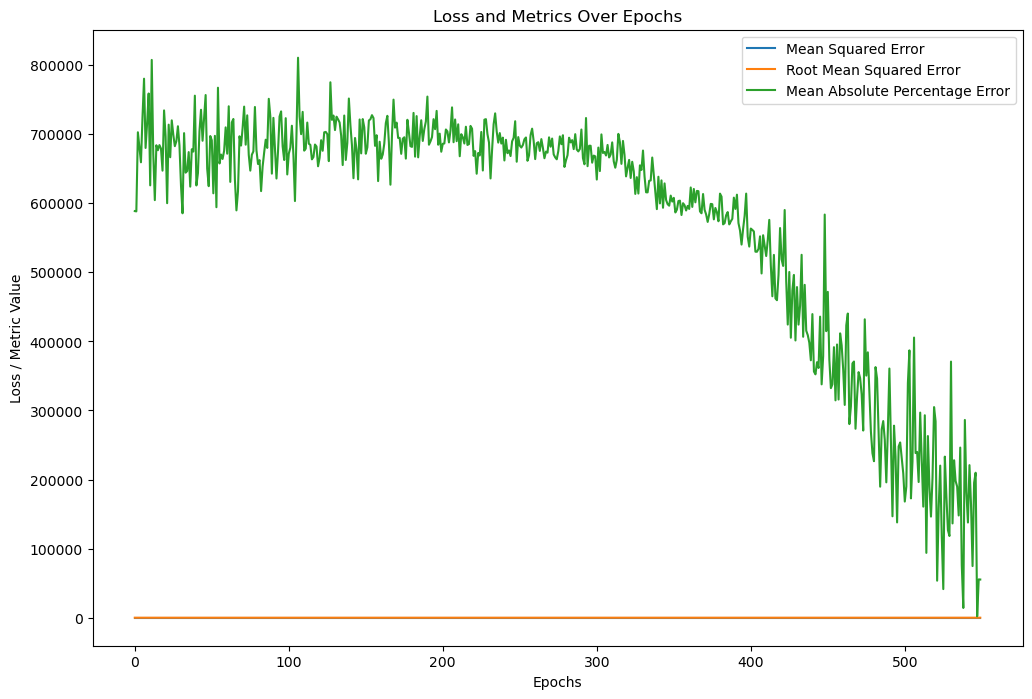

In [616]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plotting the training loss
plt.plot(history.history["loss"], label='Mean Squared Error')

# Plotting the RMSE
plt.plot(history.history["rmse"], label='Root Mean Squared Error')

# Plotting the MAPE
plt.plot(history.history["mape"], label='Mean Absolute Percentage Error')

# Adding legend, title, and labels
plt.legend()
plt.title("Loss and Metrics Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss / Metric Value")
plt.show()


In [617]:
# Parameters
time_steps = 10  # Match this to the time_steps used during training
n_cols = 1

# Creating a testing set with 60 time-steps
x_test = []
y_test = []

for i in range(time_steps, len(test_values)):
    x_test.append(test_values[i-time_steps:i, :n_cols])
    y_test.append(test_values[i, :n_cols])

# Converting to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshaping x_test to match the expected input shape (None, 60, 1)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [360]:
# # Get Prediction
# predictions = model.predict(x_test)

In [620]:

# Check the shape of x_test
print("x_test shape:", x_test.shape)

# Make predictions on the test set

preds = model.predict(x_test)


x_test shape: (21, 10, 3)
1/1 [==============================] - 1s 793ms/step


In [621]:
pred = pd.DataFrame(data={'Predictions':preds.flatten(), 'Actuals':y_test.flatten()})
pred

,Predictions,Actuals
0,0.725842,0.827273
1,0.796710,0.781818
2,0.656552,0.800000
3,0.486918,0.818182
4,0.854291,0.745455
5,0.799169,0.745455
6,0.790730,0.836364
7,0.798403,0.627273
8,0.653461,0.600000
9,0.715716,0.681818


In [528]:
# # Ensure x_train and y_train have at least 200 samples
# num_samples = 200

# # Check if x_train and y_train have enough samples
# if len(x_train) >= num_samples and len(y_train) >= num_samples:
#     # Slice the first 200 samples from x_train and y_train
#     x_train_subset = x_train[:num_samples]
#     y_train_subset = y_train[:num_samples]
    
#     # Make predictions on the subset
#     predictions = model.predict(x_train_subset)
    
#     # Create a DataFrame with the predictions and actual values
#     preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals': y_train_subset.flatten()})
    
#     # Display the DataFrame
#     print(preds_acts.head())  # Show the first few rows of the DataFrame
# else:
#     print(f"Not enough samples. x_train has {len(x_train)} samples and y_train has {len(y_train)} samples.")


7/7 [==============================] - 0s 8ms/step
   Predictions   Actuals
0     0.724324  0.727273
1     0.828821  0.845455
2     0.767765  0.754545
3     0.745719  0.818182
4     0.660019  0.681818


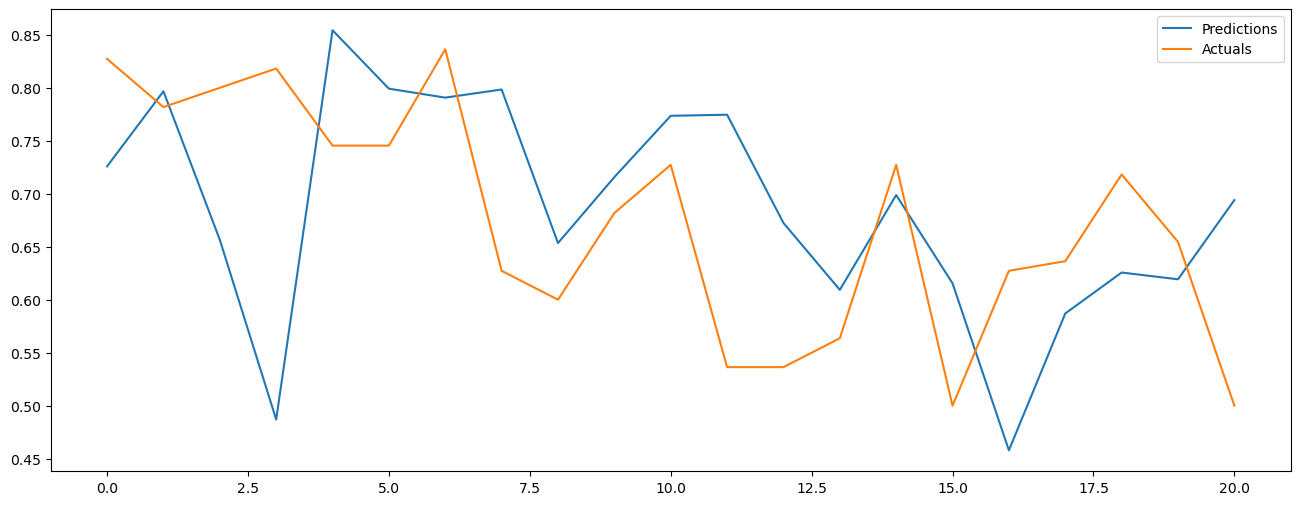

In [622]:
plt.figure(figsize = (16, 6))
plt.plot(pred['Predictions'])
plt.plot(pred['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

In [623]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming preds_acts DataFrame has 'Predictions' and 'Actuals' columns
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(pred['Actuals'], pred['Predictions']))

# Calculate MAPE
mape = mean_absolute_percentage_error(pred['Actuals'], pred['Predictions'])

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 0.13150201554247173
MAPE: 0.16386258719889302


In [630]:
model.save("news_test_latest-2.keras")

1/1 [==============================] - 0s 16ms/step


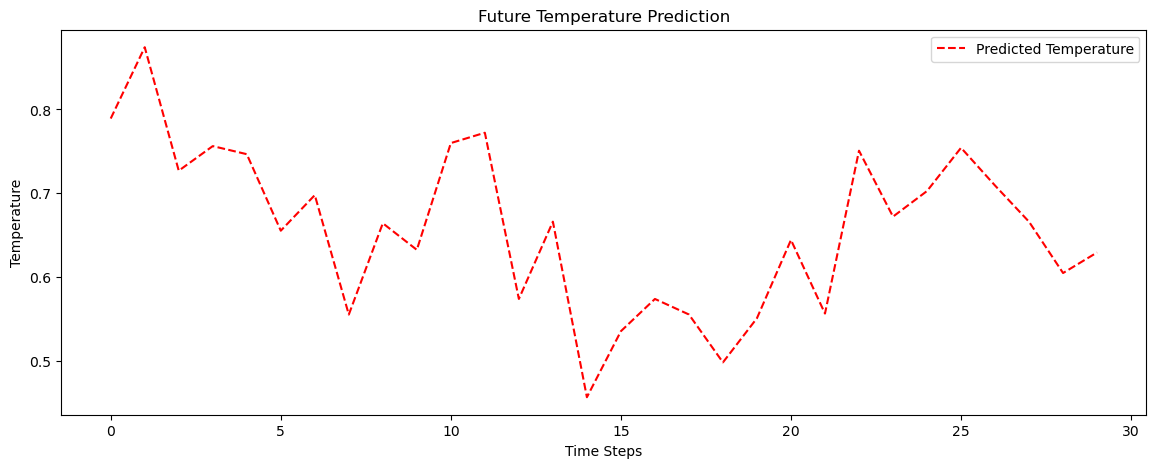

In [628]:
import numpy as np
import matplotlib.pyplot as plt

# Combine temperature and date features for the last 'time_steps' from your training data
last_sequence = np.hstack((
    train_values[-time_steps:],  # Tx values
    train_dates_sin[-time_steps:].reshape(-1, 1),  # Sin of dates
    train_dates_cos[-time_steps:].reshape(-1, 1)   # Cos of dates
))

# Reshape the last_sequence to match the input shape (1, time_steps, n_cols)
last_sequence = np.reshape(last_sequence, (1, time_steps, n_cols))

# Number of future points you want to predict
future_steps = 30

# List to store the predicted future values
future_predictions = []

for i in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_sequence)
    
    # Append the predicted value to the list
    future_predictions.append(next_pred[0, 0])
    
    # Prepare the next sequence by shifting and adding new prediction
    next_pred_reshaped = np.reshape(next_pred, (1, 1, 1))  # Reshape to match (1, 1, 1)
    
    # Generate the sine and cosine values for the next day
    next_day = (train_dates[-1] + i + 1) % 365
    next_sin = np.sin(2 * np.pi * next_day / 365).reshape(1, 1, 1)
    next_cos = np.cos(2 * np.pi * next_day / 365).reshape(1, 1, 1)
    
    # Concatenate the prediction with sine and cosine values
    next_sequence = np.concatenate((next_pred_reshaped, next_sin, next_cos), axis=2)
    
    # Update the last_sequence by removing the first element and adding the new sequence at the end
    last_sequence = np.append(last_sequence[:, 1:, :], next_sequence, axis=1)

# Convert predictions to a numpy array
future_predictions = np.array(future_predictions)

# Plotting the future predictions
plt.figure(figsize=(14, 5))
plt.plot(future_predictions, color='red', linestyle='dashed', label='Predicted Temperature')
plt.title('Future Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()


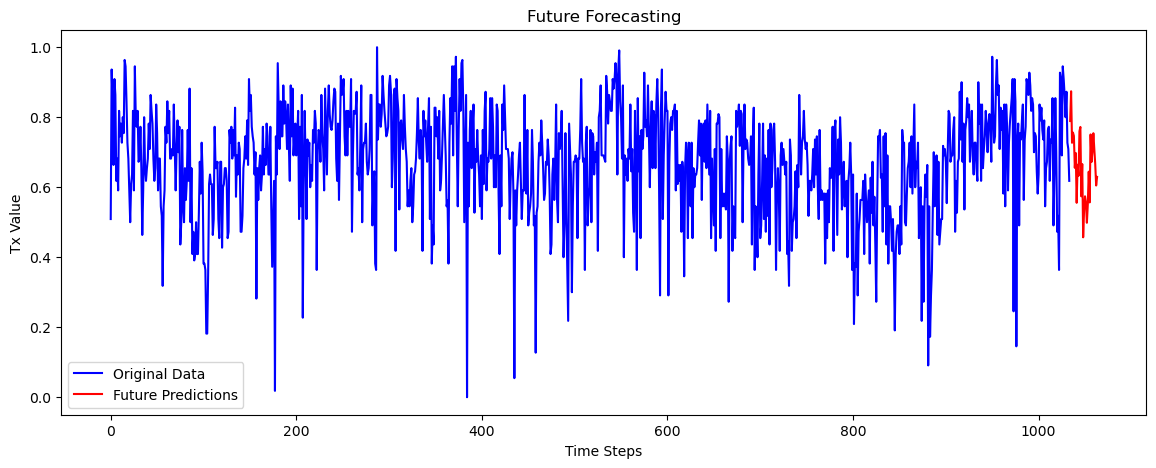

In [629]:

# Plotting the original data and future predictions
plt.figure(figsize=(14, 5))

# Plot the original training data
plt.plot(np.arange(len(train_values)), train_values, color='blue', label='Original Data')

# Plot the future predictions
plt.plot(np.arange(len(train_values), len(train_values) + future_steps), future_predictions, color='red', label='Future Predictions')

# Add labels and title
plt.title('Future Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Tx Value')
plt.legend()

# Show the plot
plt.show()

1/1 [==============================] - 0s 15ms/step
The predicted temperature for 2024-01-15 is 0.59°C


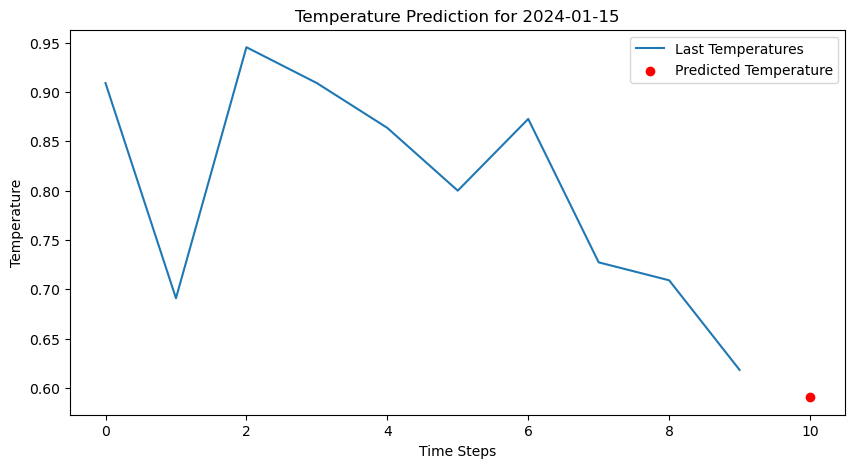

In [633]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these variables are already available from your previous code:
# - train_values: the temperature values from your training set
# - train_dates_sin: sine of the day of the year for the training set dates
# - train_dates_cos: cosine of the day of the year for the training set dates
# - model: your trained LSTM model
# - time_steps: the number of time steps used in your LSTM model
# - n_cols: the number of features (3 in this case: temperature, sin(date), cos(date))

# Function to predict temperature for a specific date
def predict_temperature_for_date(target_date):
    # Convert target_date to datetime and extract the day of year
    target_date = pd.to_datetime(target_date, format='%Y-%m-%d')
    target_day_of_year = target_date.dayofyear

    # Encode the target date
    target_sin = np.sin(2 * np.pi * target_day_of_year / 365)
    target_cos = np.cos(2 * np.pi * target_day_of_year / 365)

    # Use the last `time_steps` of data from the training set
    last_sequence = np.hstack((
        train_values[-time_steps:],  # Tx values
        train_dates_sin[-time_steps:].reshape(-1, 1),  # Sin of dates
        train_dates_cos[-time_steps:].reshape(-1, 1)   # Cos of dates
    ))

    # Reshape to match the input shape expected by the model
    last_sequence = np.reshape(last_sequence, (1, time_steps, n_cols))

    # Add the encoded date to the last sequence
    next_sin = target_sin.reshape(1, 1, 1)
    next_cos = target_cos.reshape(1, 1, 1)
    
    # Use the last predicted temperature (or the last known temperature) and the encoded date to predict
    next_sequence = np.concatenate((last_sequence[:, -1:, :1], next_sin, next_cos), axis=2)
    prediction = model.predict(next_sequence)

    return prediction[0, 0]

# Predict temperature for a specific date
target_date = '2024-01-15'  # Example target date
predicted_temperature = predict_temperature_for_date(target_date)

# Print the predicted temperature
print(f"The predicted temperature for {target_date} is {predicted_temperature:.2f}°C")

# (Optional) Plot the last few days of data with the prediction
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_values[-time_steps:])), train_values[-time_steps:], label='Last Temperatures')
plt.scatter(len(train_values[-time_steps:]), predicted_temperature, color='red', label='Predicted Temperature')
plt.title(f"Temperature Prediction for {target_date}")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()
